# Parkinson Dataset with replicated acoustic features

In [1]:
import pandas as pd
import ehrapy as ep
import ehrdata as ed
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [3]:
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/00489/ReplicatedAcousticFeatures-ParkinsonDatabase.csv -O ReplicatedAcousticFeatures_ParkinsonDatabase.csv



7[Files: 0  Bytes: 0  [0 B/s] Re]87[http://archive.ics.uci.edu/ml/]87[Files: 0  Bytes: 0  [0 B/s] Re]87File 'ReplicatedAcousticFeatures_ParkinsonDatabase.csv' already there; not retrieving.
87ReplicatedAcousticFe 100% [=============================>]  131.69K    --.-KB/s87HTTP response 200 OK [http://archive.ics.uci.edu/ml/machine-learning-databases/00489/ReplicatedAcousticFeatures-ParkinsonDatabase.csv]
87ReplicatedAcousticFe 100% [=============================>]  131.69K    --.-KB/s87[Files: 1  Bytes: 131.69K [78.2]8

# Data Wrangling

In [4]:
data = pd.read_csv("ReplicatedAcousticFeatures_ParkinsonDatabase.csv", sep=",")

Change gender attribute to 0=Woman, 1=Man, which is consistent to other datasets.

In [5]:
data["Gender"].replace((0, 1), (1, 0), inplace=True)

Since the dataset does not have a measurement ID we add one.

In [6]:
data["measurement_id"] = range(1, len(data) + 1)

In [7]:
data.set_index("measurement_id", inplace=True)

In [8]:
data.to_csv("parkinson_dataset_with_replicated_acoustic_features.csv")

## ehrapy sanity check

In [9]:
columns_obs_only=["ID", "Recording"]

In [10]:
adata = ep.io.read_csv("parkinson_dataset_with_replicated_acoustic_features.csv",
                   columns_obs_only=columns_obs_only,
                   index_column="measurement_id")
edata = ed.EHRData.from_adata(adata=adata)


In [11]:
edata=ep.pp.encode(edata,autodetect=True)

! Features 'Status', 'Gender' were detected as categorical features stored numerically.Please verify and correct using `ep.ad.replace_feature_types` if necessary.
! Feature types were inferred and stored in adata.var[feature_type]. Please verify using `ep.ad.feature_type_overview` and adjust if necessary using `ep.ad.replace_feature_types`.
! Detected no columns that need to be encoded. Leaving passed AnnData object unchanged.


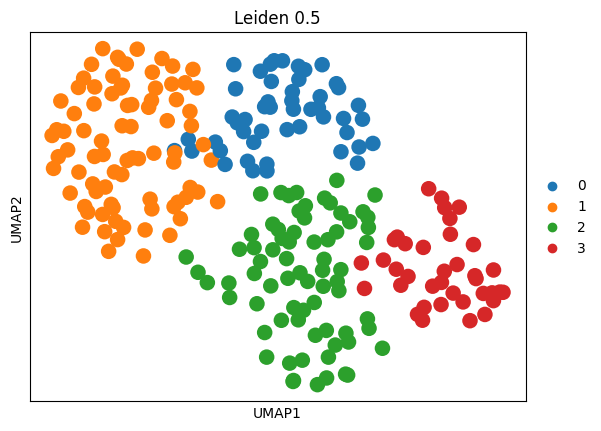

In [12]:
ep.pp.scale_norm(edata)
ep.pp.pca(edata)
ep.pp.neighbors(edata)
ep.tl.umap(edata)
ep.tl.leiden(edata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(edata, color=["leiden_0_5"], title="Leiden 0.5")